In [1]:
import networkx as nx

In [2]:
g = nx.DiGraph()

In [3]:
g.add_nodes_from(list("abcdefgh"))

In [4]:
g.add_edges_from(
    [("a", "c"), ("b", "c"), ("c", "e"), ("d", "e"), ("e", "h"), ("f", "h"), ("g", "h")]
)

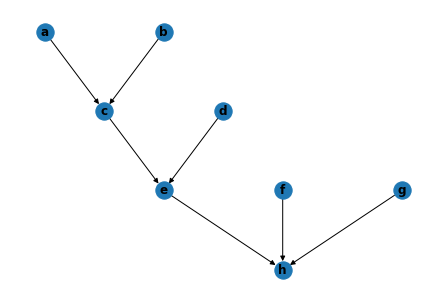

In [5]:
pos = nx.nx_pydot.pydot_layout(g, prog="dot")
nx.draw(g, pos=pos, with_labels=True, font_weight="bold")

In [6]:
input_nodes = [node for node in g.nodes if not g.in_degree(node)]
input_nodes

['a', 'b', 'd', 'f', 'g']

In [7]:
goal_nodes = [node for node in g.nodes if not g.out_degree(node)]
goal_nodes

['h']

In [8]:
for node, val in zip("abcdefg", range(5, 40, 5)):
    g.nodes[node]["value"] = val

In [9]:
import numpy as np


def fun_c(a, b):
    return a * np.exp(b)


def fun_e(c, d):
    return d * np.tan(c)


def fun_h(e, f, g):
    return (f * np.pi ** (1 / e)) / g

In [10]:
fun_c(3, 5)

445.23947730772977

In [11]:
fun_c(b=5, a=3)

445.23947730772977

In [12]:
fun_c(**{"a": 3, "b": 5}) # Doble asterisco implica desempaquetar

445.23947730772977

In [13]:
g.nodes["c"]["fun"] = fun_c
g.nodes["e"]["fun"] = fun_e
g.nodes["h"]["fun"] = fun_h

In [14]:
for pred in g.predecessors("h"):
    print(pred)


e
f
g


In [15]:
def eval(node):
    if node in input_nodes:
        print(f'Nodo de entrada {node} {g.nodes[node]["value"]}')
        return g.nodes[node]["value"]
    else:
        param = {pred: eval(pred) for pred in g.predecessors(node)}
        g.nodes[node]["value"] = g.nodes[node]["fun"](**param)
        print(f'Nodo de cálculo {node} {g.nodes[node]["value"]}')
        return g.nodes[node]["value"]

In [16]:
eval("h")

Nodo de entrada a 5
Nodo de entrada b 10
Nodo de cálculo c 110132.32897403359
Nodo de entrada d 20
Nodo de cálculo e 15.423303607947446
Nodo de entrada f 30
Nodo de entrada g 35
Nodo de cálculo h 0.9231810749459397


0.9231810749459397

In [17]:
(30 * np.pi ** (1 / (20 * np.tan(5 * np.exp(10))))) / 35

0.9231810749459397

In [18]:
fun_h(g.nodes["e"]["value"], g.nodes["f"]["value"], g.nodes["g"]["value"])

0.9231810749459397

In [19]:
nx.number_of_selfloops(g)

0

In [20]:
fun_e(g.nodes["c"]["value"], g.nodes["d"]["value"])

15.423303607947446

In [21]:
g.nodes["e"]["value"]

15.423303607947446

In [22]:
fun_c(g.nodes["a"]["value"], g.nodes["b"]["value"])

110132.32897403359

In [23]:
g.nodes["c"]["value"]

110132.32897403359